In [49]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from textblob import TextBlob

In [5]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Cloud\\internship_tasks\\twitter_training\\twitter_training.csv')

In [6]:
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
df.shape

(74681, 4)

In [15]:
c_names = ['ID', 'Entity', 'Sentiment', 'text'] 
df = pd.read_csv('C:\\Users\\Cloud\\internship_tasks\\twitter_training\\twitter_training.csv', names=c_names)

In [16]:
df.head()

,ID,Entity,Sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [26]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
text         686
dtype: int64

In [27]:
df.dropna(axis=0 , inplace=True)

In [28]:
df.isnull().sum()

ID           0
Entity       0
Sentiment    0
text         0
dtype: int64

In [29]:
# Define a function to calculate the sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

In [30]:
# Calculate the sentiment for each tweet
#df['polarity'], df['subjectivity'] = zip(*df['text'].apply(lambda x: get_sentiment(' '.join(x))))
df['polarity'], df['subjectivity'] = zip(*df['text'].apply(get_sentiment))

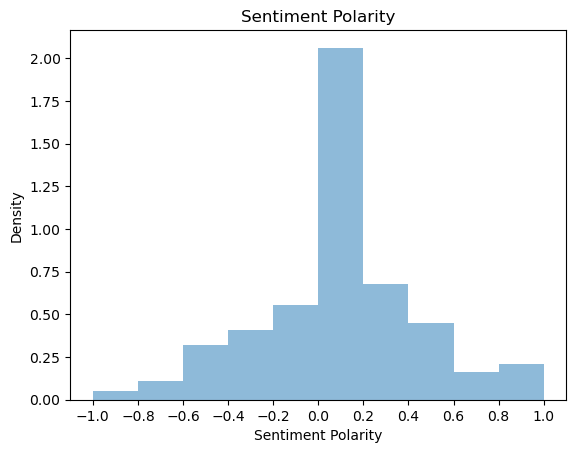

In [31]:
# Define a function to create a histogram of sentiment polarity
def plot_polarity_histogram(data, title='Sentiment Polarity'):
    _, bins, _ = plt.hist(data['polarity'], bins=10, alpha=0.5, density=True)
    plt.title(title)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Density')
    plt.xticks(bins)
    
# Plot the sentiment polarity histogram
plot_polarity_histogram(df)    

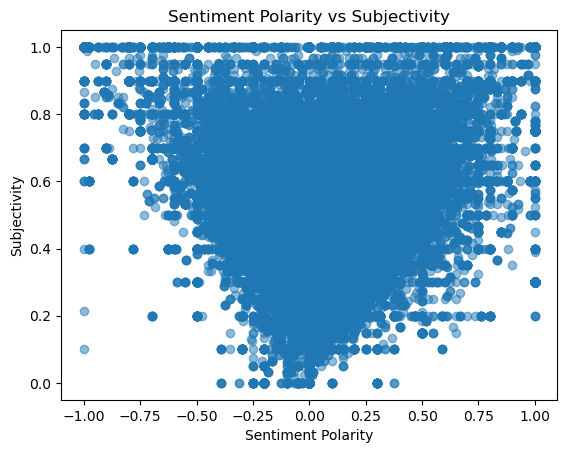

In [32]:
# Define a function to create a scatter plot of sentiment polarity vs subjectivity
def plot_polarity_subjectivity_scatter(data, title='Sentiment Polarity vs Subjectivity'):
    plt.title(title)
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Subjectivity')
    plt.scatter(data['polarity'], data['subjectivity'], alpha=0.5)

# Plot the sentiment polarity vs subjectivity scatter plot
plot_polarity_subjectivity_scatter(df)

In [40]:
sentiment_counts = df['Sentiment'].value_counts() 
sentiment_counts

Sentiment
Negative      22358
Positive      20655
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

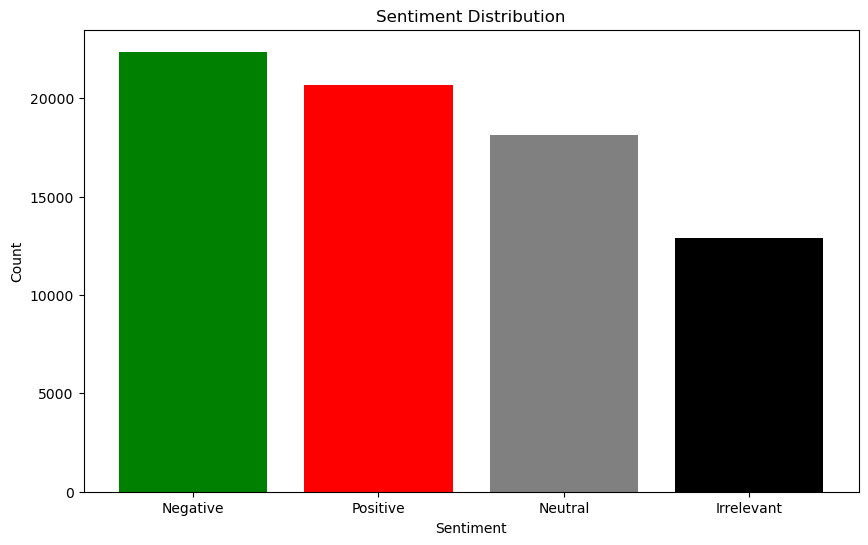

In [44]:
# Visualize the sentiment distribution
plt.figure(figsize=(10,6))
plt.bar(df['Sentiment'].value_counts().index, df['Sentiment'].value_counts(), color=['green', 'red', 'grey','black'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [46]:
# Filter the sentiment analysis data based on the specific entity
entity_sentiment_data = df[df['Entity'] == 'Facebook']

# Calculate the number of tweets for each sentiment category
entity_sentiment_counts = entity_sentiment_data['Sentiment'].value_counts()


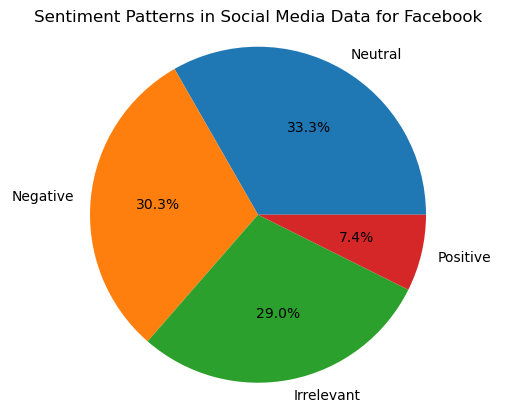

In [48]:
# Create a pie chart
plt.pie(entity_sentiment_counts, labels=entity_sentiment_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Patterns in Social Media Data for Facebook')
plt.show()

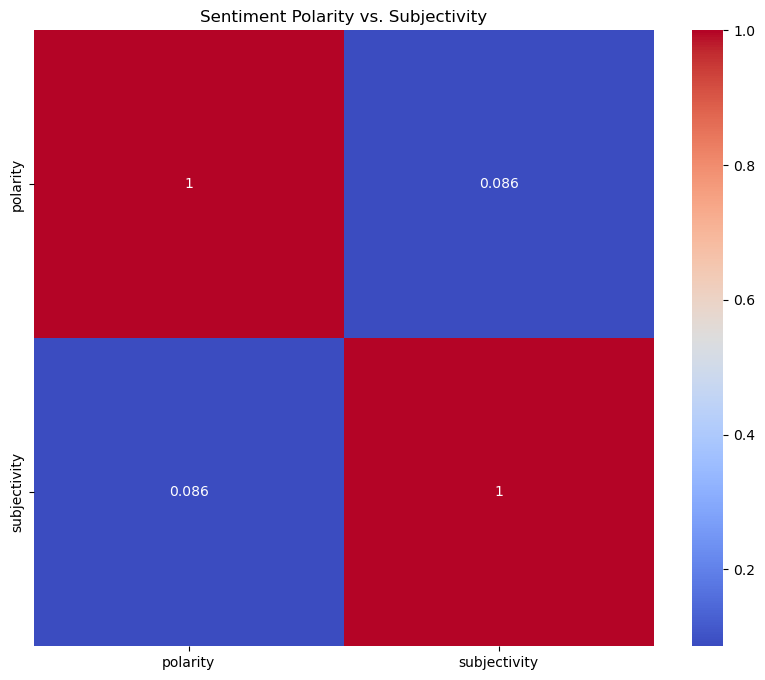

In [51]:
# Create a heatmap of the polarity and subjectivity values
plt.figure(figsize=(10, 8))
sn.heatmap(df[['polarity', 'subjectivity']].corr(), annot=True, cmap='coolwarm')
plt.title('Sentiment Polarity vs. Subjectivity')
plt.show()